In [64]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Real_Estate.csv.xls")
df = df.drop(columns = ['date'])
print(df.isnull())
df.head()

       age  distance  convenience_stores  latitude  longitude  price
0    False     False               False     False      False  False
1    False     False               False     False      False  False
2    False     False               False     False      False  False
3    False     False               False     False      False  False
4    False     False               False     False      False  False
..     ...       ...                 ...       ...        ...    ...
409  False     False               False     False      False  False
410  False     False               False     False      False  False
411  False     False               False     False      False  False
412  False     False               False     False      False  False
413  False     False               False     False      False  False

[414 rows x 6 columns]


,age,distance,convenience_stores,latitude,longitude,price
0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,8.5,967.4000,6,25.011037,121.479946,21.654710


In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['age', 'distance', 'convenience_stores', 'latitude', 'longitude']].values, df.price.values)

LinearRegression()

In [66]:
reg1 = reg.predict([[30, 543, 10, 29, 120]])
print(reg1)

[312.47609402]


In [67]:
x = df[['age', 'distance', 'convenience_stores', 'latitude', 'longitude']]
y = df.price

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
y_test

66     37.562445
16     13.673532
385     0.000000
54     38.906385
70      8.784265
         ...    
182    15.466847
338    28.726111
210    47.961563
127    12.056372
333    21.222940
Name: price, Length: 125, dtype: float64

In [69]:
reg.fit(x_train, y_train)
reg1 = reg.predict(x_test)
reg1

array([20.73394852, 26.74134616, 10.43365115, 29.79541953,  5.09851392,
       35.54802539, 33.95725071, 20.69228678, 40.58647449, 18.73656852,
       41.08975923, 47.65908046, 30.58760265, 31.49644621, 42.90649527,
       37.56601783, 37.20889578, 26.40853837, 29.68288628, 36.01047145,
       -2.14195332, 42.41385314, 30.88335855, 38.27011428, 45.37494589,
       40.15329656, 10.71453819, 28.48269724, 24.99241177, 35.13805383,
       21.98539333, 24.7398953 , -3.16960897, 28.05951617, 27.66629057,
       24.21959342, 29.92163812, 25.26079798, 21.40000033, 40.92553366,
       27.17762217, 24.8394855 , 25.37065742, 36.54442152, 32.98665155,
       47.17912995, 40.02252585, 13.14408073, 46.87899152, 45.17048651,
       32.3477261 , 37.7082699 , -3.75855074, 44.13628943, 29.79492347,
       14.31018729, 17.48704952, 39.1022621 , 32.0938245 , 33.24075918,
       34.77369969, 13.59739469, -2.28662777,  8.43038142, 19.87379125,
       11.46987659, 32.65625876, 35.7979737 , 13.4676192 , 38.22

(array([11., 11., 18., 11., 10., 11., 16., 16., 13.,  8.]),
 array([-20.40122955, -16.49011143, -12.57899331,  -8.66787519,
         -4.75675706,  -0.84563894,   3.06547918,   6.9765973 ,
         10.88771543,  14.79883355,  18.70995167]),
 <BarContainer object of 10 artists>)

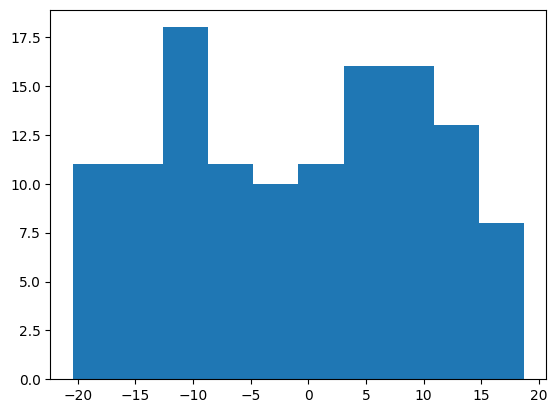

In [70]:
plt.hist(reg1 - y_test)

In [71]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
score1 = r2_score(y_test, reg1)
score2 = mean_absolute_error(y_test, reg1)
score3 = root_mean_squared_error(y_test, reg1)
print(score1)
print(score2)
print(score3)

0.498416229183651
9.718820600140118
11.061829066564757


In [102]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_data = std.fit_transform(df)
std_data

array([[-0.43471616,  2.52450329,  1.29797598,  1.38529149,  1.53679991,
        -1.43742806],
       [ 1.4556975 , -0.66129988, -0.78751712,  1.59604714,  0.99131113,
        -0.26261442],
       [-1.47359214,  0.76482921,  1.99314034,  1.25241649,  0.29932618,
        -0.15305728],
       ...,
       [-1.56726128, -0.51269532,  1.29797598, -0.40182985,  0.85767083,
        -0.24453774],
       [ 1.48975901, -0.64541822,  0.25522943,  1.00448848,  1.41036241,
        -0.24259804],
       [-0.54541606, -0.81486622,  0.60281161, -0.85721194,  0.22731888,
         0.53893076]])

In [103]:
df = pd.DataFrame(std_data)
df.columns = ['age', 'distance', 'convenience_stores', 'latitude', 'longitude', 'price']
df

,age,distance,convenience_stores,latitude,longitude,price
0,-0.434716,2.524503,1.297976,1.385291,1.536800,-1.437428
1,1.455698,-0.661300,-0.787517,1.596047,0.991311,-0.262614
2,-1.473592,0.764829,1.993140,1.252416,0.299326,-0.153057
3,0.323152,-0.007865,0.255229,-0.443827,-1.413003,0.571418
4,-0.843454,-0.081208,0.602812,1.550023,-1.495810,-0.473397
...,...,...,...,...,...,...
409,-0.008947,-0.748211,0.602812,0.313909,-1.241646,-0.000371
410,-0.553931,-0.619740,-0.787517,-0.974573,-1.348459,0.303155
411,-1.567261,-0.512695,1.297976,-0.401830,0.857671,-0.244538
412,1.489759,-0.645418,0.255229,1.004488,1.410362,-0.242598


In [104]:
x1 = df[['age', 'distance', 'convenience_stores', 'latitude', 'longitude']]
y1 = df.price

In [105]:
reg3 = LinearRegression()
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3)
y_test1

389    0.698893
75     0.248906
142   -0.009230
241   -1.469857
235    0.383264
         ...   
344   -0.321838
231   -1.542020
126    0.240407
32     0.111445
334   -0.063139
Name: price, Length: 125, dtype: float64

In [106]:
reg3.fit(x_train1, y_train1)
reg4 = reg3.predict(x_test1)
reg4

array([ 0.65007737,  0.30022084,  0.42383897, -0.45850156,  0.76756242,
        0.06643057, -0.13842864,  0.28573995, -0.10380735,  0.78447964,
        0.43227658,  0.42999133,  0.63121797, -0.23393832,  0.02568573,
        0.23698218, -1.53660496,  0.51454097, -1.19383721,  0.57025483,
       -0.75638646, -0.33429081, -0.05906061,  0.57702407,  0.38724078,
        0.53029539, -0.17662782,  0.43436108, -0.62578612,  0.10401221,
        0.52286496,  0.66845849,  0.47134354, -1.57917863,  0.19889718,
        0.16457106,  0.54292645,  0.01513034,  0.53178465,  0.17446758,
       -0.70021496, -0.21549185,  0.76131125,  0.57093872, -0.04082863,
       -0.6112794 , -0.03369697,  0.40766194, -0.1820847 ,  0.98684366,
        0.53325449,  0.38536088,  0.70361824, -2.14051938, -0.44622902,
       -0.39462699, -0.73669364,  0.01802507, -0.206075  ,  0.53839648,
        0.02540699,  0.31369809,  0.34953534,  0.66537976, -0.03205198,
       -0.04985767,  0.925074  ,  0.78318695,  1.28625068,  0.47

(array([ 7.,  9., 18., 11., 16., 16., 15., 13., 14.,  6.]),
 array([-1.38701003, -1.1246759 , -0.86234177, -0.60000763, -0.3376735 ,
        -0.07533936,  0.18699477,  0.44932891,  0.71166304,  0.97399718,
         1.23633131]),
 <BarContainer object of 10 artists>)

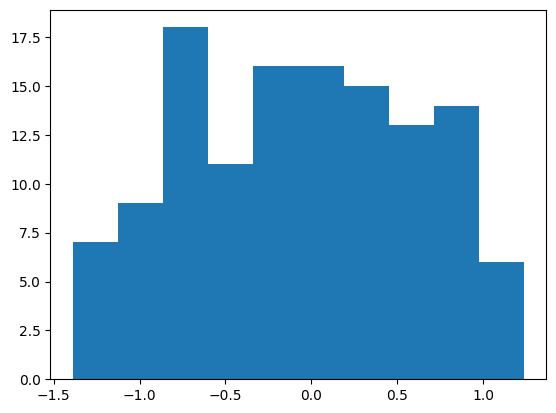

In [107]:
plt.hist(reg4 - y_test1)

In [108]:
score4 = r2_score(y_test1, reg4)
score5 = mean_absolute_error(y_test1, reg4)
score6 = root_mean_squared_error(y_test1, reg4)
print(score4)
print(score5)
print(score6)

0.5019240348530194
0.5668766378184537
0.6700514092883869
